In [3]:
#06-02 Baby Names
#mining baby names

import pandas as pd
import matplotlib.pyplot as pp
import zipfile
import os

In [4]:
#read in the names.zip and extract everything
zipfile.ZipFile('names.zip').extractall('.')

In [5]:
#view the files directly
os.listdir('names')[:10]

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt']

In [6]:
open('names/yob2011.txt','r').readlines()[:10]

['Sophia,F,21816\n',
 'Isabella,F,19870\n',
 'Emma,F,18777\n',
 'Olivia,F,17294\n',
 'Ava,F,15480\n',
 'Emily,F,14236\n',
 'Abigail,F,13229\n',
 'Madison,F,12360\n',
 'Mia,F,11512\n',
 'Chloe,F,10970\n']

In [7]:
#using pandas to read the same file and assigning the results to a variable
names2011 = pd.read_csv('names/yob2011.txt')

In [8]:
names2011[:10]

,Sophia,F,21816
0,Isabella,F,19870
1,Emma,F,18777
2,Olivia,F,17294
3,Ava,F,15480
4,Emily,F,14236
5,Abigail,F,13229
6,Madison,F,12360
7,Mia,F,11512
8,Chloe,F,10970
9,Elizabeth,F,10062


In [9]:
#adjust the reading so the header is corrected
names2011 = pd.read_csv('names/yob2011.txt', names=['name','sex','number'])
names2011[:10]

,name,sex,number
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480
5,Emily,F,14236
6,Abigail,F,13229
7,Madison,F,12360
8,Mia,F,11512
9,Chloe,F,10970


In [10]:
names2011.tail()

,name,sex,number
33864,Zylar,M,5
33865,Zylas,M,5
33866,Zyran,M,5
33867,Zyshawn,M,5
33868,Zytavion,M,5


In [14]:
#create a new list that contains all the names from all the years;
#add a year column also

names_all = []

for year in range(1880,2014+1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year),
                                 names=['name','sex','number']))
    names_all[-1]['year'] = year #append year as the last column

In [16]:
#names_all

In [18]:
#now place all the list elements (data frames) into a single data frame
allyears = pd.concat(names_all)
allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [19]:
#create a new data frame that is indexed by sex, name, and year and sorted
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()
allyears_indexed.head()

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5

In [21]:
#lookup Mary and Nima
allyears_indexed.loc['F','Mary']

,number
year,
1880,7065
1881,6919
1882,8148
1883,8012
1884,9217
1885,9128
1886,9890
1887,9888
1888,11754


In [26]:
allyears_indexed.loc['M','Nima']

,number
year,
1971,5
1972,5
1976,5
1977,11
1978,17
1979,25
1980,20
1981,19
1982,38


In [27]:
allyears_indexed.loc['M','Barack']

,number
year,
2007,5
2008,52
2009,69
2010,28
2011,15
2012,16
2013,11
2014,11


In [37]:
#create a function to plot a name
def plotname(sex, name):
    data = allyears_indexed.loc[sex,name]
    pp.plot(data.index, data.values)
    #pp.show()

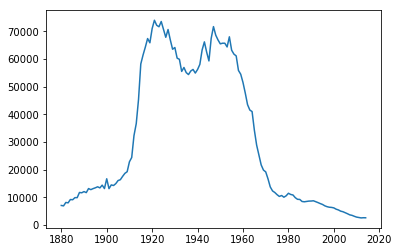

In [33]:
plotname('F','Mary')

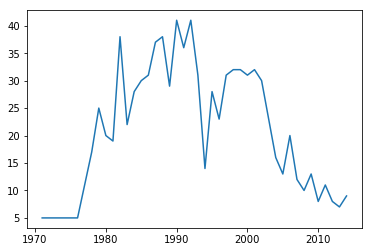

In [34]:
plotname('M','Nima')

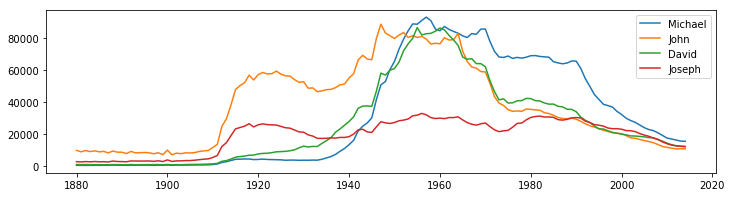

In [39]:
#loop through a collection of popular boy names and graph them all

pp.figure(figsize=(12,3))

names = ['Michael', 'John', 'David', 'Joseph']
for name in names:
    plotname('M', name)

pp.legend(names)
pp.show()